In [1]:
from collections import ChainMap
import datetime

import requests
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
import dew_gwdata as gd
import sa_gwdata

import wrap_technote as tn

from wrap_technote import utils

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["figure.dpi"] = 120

In [4]:
plt.style.use("ggplot")

In [5]:
db = gd.sageodata()
# wells = tn.load_gw_resource_wells("Barossa_Lower_WL", "WL", 2015, 2019)

well_id = "LAC030"
wells = db.drillhole_details(db.find_wells(well_id))

In [6]:
df = gd.fetch_wl_data(wells)

C:\Users\kinverarity\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


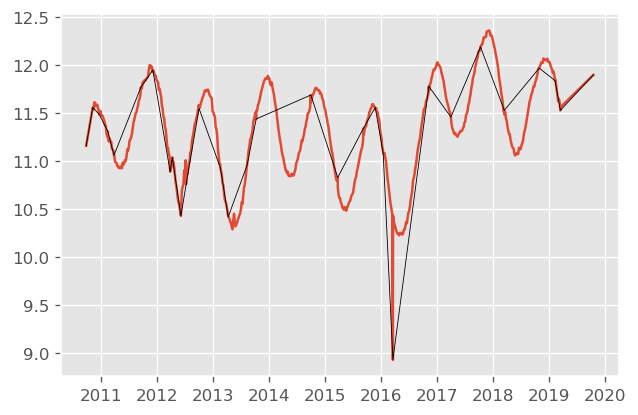

In [7]:
plt.plot(df[df.well_id == well_id].obs_date, df[df.well_id == well_id].rswl)
plt.plot(
    df[(df.well_id == well_id) & (df.database == "SA Geodata")].obs_date,
    df[(df.well_id == well_id) & (df.database == "SA Geodata")].rswl,
    color="k",
    lw=0.5,
)

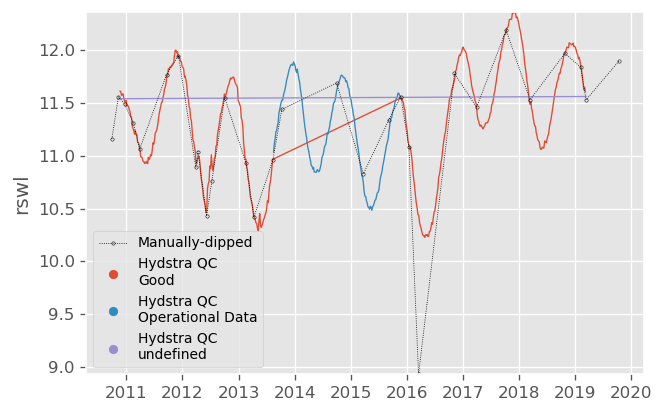

In [38]:
tn.plot_wls_with_logger(
    df[df.database == "SA Geodata"], df[df.database == "Hydstra"], wl_col="rswl"
)